In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import glob
from scipy import stats as stats
# Local import 
# > Make sure SIO_wrap dir is on the same path as this script.
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from SIO_wrap import dir_tree, fnames

from setdir import *



/Users/eddifying/Python/drifters/ already exists
/Users/eddifying/Python/drifters/02-code/ already exists
/Users/eddifying/Python/drifters/02-code/SIO_wrap/ already exists
/Users/eddifying/Python/drifters/01-data/04-aux/ already exists
/Users/eddifying/Python/drifters/01-data/02-intermediate/ already exists


# Doing a few things to reduce the filesize of the processed data (for Github)


1. Separate into four (or five) files, one per deployment

2. Replace drogue_cnts with the date when the drogue was lost


In [2]:
# Mark when the drogue was lost
fname_full = cat_interim_path('TERIFIC_drifters.nc')
drifters = xr.open_dataset(fname_full)
drifters

<xarray.Dataset>
Dimensions:      (trajectory: 178, obs: 18859)
Coordinates:
  * trajectory   (trajectory) int64 300234066416410 ... 300234068440310
  * obs          (obs) int64 1 2 3 4 5 6 ... 18854 18855 18856 18857 18858 18859
Data variables:
    time         (trajectory, obs) datetime64[ns] ...
    lat          (trajectory, obs) float64 ...
    lon          (trajectory, obs) float64 ...
    SST          (trajectory, obs) float64 ...
    u            (trajectory, obs) float64 ...
    v            (trajectory, obs) float64 ...
    slp          (trajectory, obs) float64 ...
    drogue_cnts  (trajectory, obs) float64 ...
Attributes: (12/22)
    ncei_template_version:     NCEI_NetCDF_Trajectory_Template_v2.0
    featureType:               trajectory
    instrument:                Surface velocity profiler (SVP)
    title:                     TERIFIC drifters: Deployed in the subpolar Nor...
    keywords:                  SVP drifters, SVPB drifters
    Conventions:               CF-1.6, ACDD-1.3
    ...                        ...
    time_coverage_start:       2019-12-05
    time_coverage_end:         2022-01-11
    time_coverage_resolution:  hourly
    creator_type:              person
    platform:                  Surface Velocity Profiler
    sea_name:                  Atlantic

# Find the deployment date


- From the time data, identify the first measurements.
- Save this as the deployment date.
- Using the histogram, identify deployment periods.
- Assign a deployment number to the original drifter dataset.


../01-data/02-intermediate/TERIFIC_drifters.nc


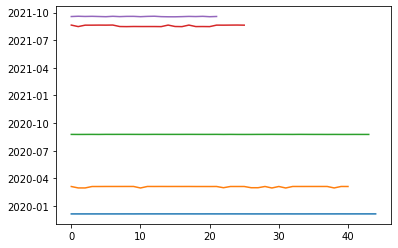

In [12]:
deployments = {
    'deploy1': [np.datetime64('2019-12-04'), np.datetime64('2019-12-05')],
    # deploy2: Remove points before March 3rd (testing)
    'deploy2': [np.datetime64('2020-02-28'), np.datetime64('2020-03-05')], 
    'deploy3': [np.datetime64('2020-08-23'), np.datetime64('2020-08-25')],
    'deploy4': [np.datetime64('2021-08-15'), np.datetime64('2021-08-22')],
    'deploy5': [np.datetime64('2021-09-16'), np.datetime64('2021-09-19')]
}


#---------
# For each drifter, find the time of the deployment (first data)
numd = len(drifters.trajectory)
alldstart = np.zeros(numd, dtype='datetime64[ns]')

for i in range(len(drifters.trajectory)):
    dstart = np.nanmin(drifters.time[i,:].values)
    alldstart[i] = dstart
    
#isort = np.argsort(alldstart)
#plt.plot(alldstart[isort])


# --------
# Assign a deployment number
deployvec = np.zeros(numd, dtype='int')

for key in deployments:
    drange = deployments[key]
    ideploy = np.where((alldstart<drange[1]) * (alldstart>drange[0]))
    plt.plot(alldstart[ideploy])
    if key=='deploy1':
        deployvec[ideploy] = 1
    elif key=='deploy2':
        deployvec[ideploy] = 2
    elif key=='deploy3':
        deployvec[ideploy] = 3
    elif key=='deploy4':
        deployvec[ideploy] = 4
    elif key=='deploy5':
        deployvec[ideploy] = 5
    
drifters["time_start"] = ('trajectory', alldstart)
drifters["deploy_num"] = ('trajectory', deployvec) 



fname_full = cat_interim_path('TERIFIC_drifters.nc')
drifters.to_netcdf(fname_full)
drifters
print(fname_full)
# plt.hist(alldstart, 50)

In [5]:
fname_full = 'TERIFIC_drifters'

for i in range(1,6):
    ds1 = drifters.where(drifters['deploy_num']==i, drop=True)
    slp1 = ds1.slp
    if not np.count_nonzero(~np.isnan(slp1)):
        ds1 = ds1.drop('slp')
    time1 = ds1.time
    tmp = np.count_nonzero(~np.isnan(time1), axis=0)
    no_valid_meas = np.where(tmp==0)
    ds1 = ds1.drop_isel(obs=no_valid_meas)
    
    ds1.to_netcdf(cat_proc_path(fname_full+str(i)+'.nc'), mode='w')

    print('Doing '+str(i))


Doing 1
Doing 2
Doing 3
Doing 4
Doing 5


In [6]:
# Plot a single deployment
i=4
deploy4 = xr.open_dataset(cat_proc_path(fname_full+str(i)+'.nc'))


# Remove the barometric pressure values that are a constant 850


In [106]:
#---------
# For each drifter, find the time of the deployment (first data)
numd = len(drifters.trajectory)
alldstart = np.zeros(numd, dtype='datetime64[ns]')

#for i in range(0,0): #len(drifters.trajectory)):
slp = deploy1["slp"].values

In [110]:
np.count_nonzero(~np.isnan(slp))

0

In [109]:
slp_vec = np.reshape(slp, -1)
np.nanmin(slp_vec)
drifters


/var/folders/0b/1448f7v57h97h1dnny_s99600000gr/T/ipykernel_45999/4126902845.py:2: RuntimeWarning: All-NaN slice encountered
  np.nanmin(slp_vec)


<xarray.Dataset>
Dimensions:      (trajectory: 199, obs: 18590)
Coordinates:
  * trajectory   (trajectory) int64 300234066416410 ... 300234068440310
  * obs          (obs) int64 1 2 3 4 5 6 ... 18585 18586 18587 18588 18589 18590
Data variables:
    time         (trajectory, obs) datetime64[ns] ...
    lat          (trajectory, obs) float64 ...
    lon          (trajectory, obs) float64 ...
    SST          (trajectory, obs) float64 ...
    u            (trajectory, obs) float64 ...
    v            (trajectory, obs) float64 ...
    slp          (trajectory, obs) float64 nan nan nan nan ... nan nan nan nan
    drogue_cnts  (trajectory, obs) float64 38.0 40.0 41.0 35.0 ... nan nan nan
    time_start   (trajectory) datetime64[ns] 2019-12-04T21:00:00 ... 2021-09-...
    deployment   (trajectory) int64 1 1 1 1 1 1 1 1 1 1 ... 4 4 4 4 4 4 4 4 5 5
    deploy_num   (trajectory) int64 1 1 1 1 1 1 1 1 1 1 ... 4 4 4 4 4 4 4 4 5 5
Attributes: (12/22)
    ncei_template_version:     NCEI_NetCDF_Trajectory_Template_v2.0
    featureType:               trajectory
    instrument:                Surface velocity profiler (SVP)
    title:                     TERIFIC drifters: Deployed in the subpolar Nor...
    keywords:                  SVP drifters, SVPB drifters
    Conventions:               CF-1.6, ACDD-1.3
    ...                        ...
    time_coverage_start:       2019-12-05
    time_coverage_end:         2022-01-11
    time_coverage_resolution:  hourly
    creator_type:              person
    platform:                  Surface Velocity Profiler
    sea_name:                  Atlantic

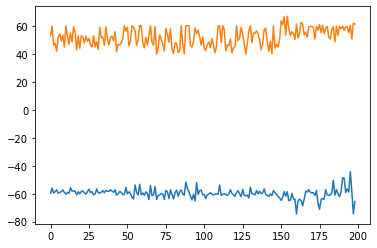

In [3]:
# Find the lat/lon ranges of each drifter
# Print results as a table?
numd = len(drifters.trajectory)
all_lonmin = np.zeros(numd)
all_latmin = np.zeros(numd)

for i in range(len(drifters.trajectory)):
    lonmin = drifters.lon[i,:].min()
    all_lonmin[i] = lonmin
    
    latmin = drifters.lat[i,:].min()
    all_latmin[i] = latmin
        

plt.plot(all_lonmin)
plt.plot(all_latmin)

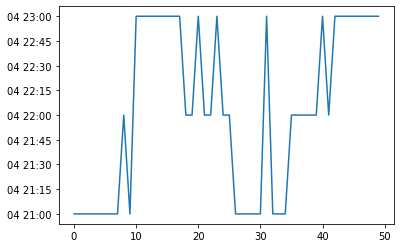

In [58]:
drange = deployments['deploy1']
ideploy = np.where((alldstart<drange[1]) * (alldstart>drange[0]))
plt.plot(alldstart[ideploy])

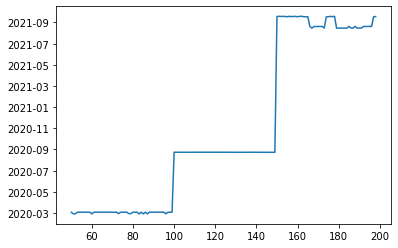

In [73]:
time_start = drifters['time_start']
deploynum = drifters['deployment']
ione = (deploynum==1)

plt.plot(time_start.where(deploynum>1))

(array([[ 1.,  2.,  3., ..., 64., 16., 16.],
        [ 2.,  0.,  1., ..., 66., 25., 13.],
        [ 2.,  0.,  1., ..., 65., 30., 14.],
        ...,
        [ 0.,  0.,  0., ...,  3.,  3.,  3.],
        [ 0.,  0.,  0., ...,  1.,  1.,  0.],
        [ 0.,  0.,  0., ...,  1.,  0.,  0.]]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <a list of 18590 BarContainer objects>)

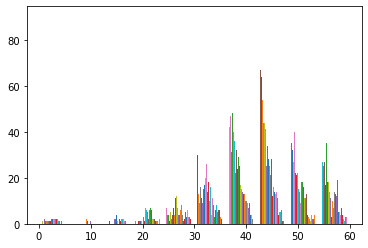

In [75]:
if 0:
    # Make an enormous histogram of drogue_cnts
    drogue_cnts = drifters["drogue_cnts"]
    A=drogue_cnts.values.flatten()
    print(A.shape)
    A2 = A[~np.isnan(A)]
    print(A2.shape)

In [ ]:
stats.mode(A2)



ModeResult(mode=array([60.]), count=array([264588]))

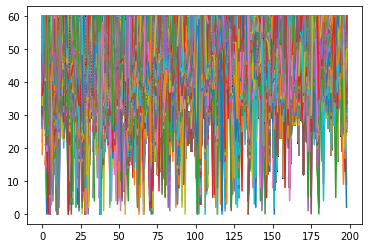

In [5]:
plt.plot(drogue_cnts.values)
plt.show()

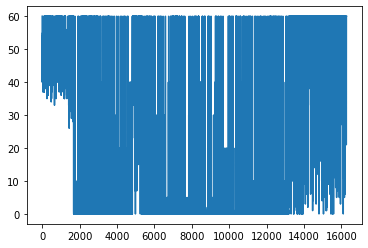

In [53]:
plt.plot(drogue_cnts[5,:])

In [54]:
stats.mode(drogue_cnts[5,:])

ModeResult(mode=array([0.]), count=array([9671]))

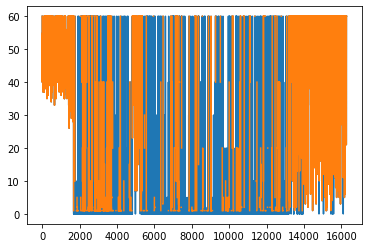

In [17]:
drifter1 = drifters.isel(trajectory=[5])
# First cut to the non-nan values

plt.plot(drifter1.drogue_cnts[0,:])

drog_drop = drifter1.where(drifter1.drogue_cnts>0)

plt.plot(drog_drop.drogue_cnts[0,:])
plt.show()



In [11]:
#drifter2 = drifter1[drifter1.notnull()]
drifter2 = drifter1.where(drifter1.lat.notnull())
drifter2
lat = drifter1.lat.values


array([[60.13739342, 60.14434219, 60.15256319, ...,         nan,
                nan,         nan]])

<xarray.DataArray 'lat' ()>
array(44.70951066)
Coordinates:
    trajectory  int64 300234066416930


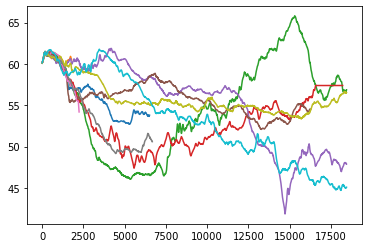

In [7]:
for i in range(0,10):
    lat1 = drifters.lat[i,:]
    lon1 = drifters.lon[i,:]
    sst1 = drifters.SST[i,:]
    plt.plot(lat1)
    
    latmin = lat1.min()
    
print(latmin)
    
    

In [109]:
drifters

<xarray.Dataset>
Dimensions:      (trajectory: 199, obs: 18447)
Coordinates:
  * trajectory   (trajectory) int64 300234066416410 ... 300234068440310
  * obs          (obs) int64 1 2 3 4 5 6 ... 18442 18443 18444 18445 18446 18447
    time         (trajectory, obs) datetime64[ns] ...
    lat          (trajectory, obs) float64 ...
    lon          (trajectory, obs) float64 ...
Data variables:
    SST          (trajectory, obs) float64 ...
    u            (trajectory, obs) float64 ...
    v            (trajectory, obs) float64 ...
    slp          (trajectory, obs) float64 ...
    drogue_cnts  (trajectory, obs) float64 ...
Attributes: (12/22)
    ncei_template_version:     NCEI_NetCDF_Trajectory_Template_v2.0
    featureType:               trajectory
    instrument:                Surface velocity profiler (SVP)
    title:                     TERIFIC drifters: Deployed in the subpolar Nor...
    keywords:                  SVP drifters, SVPB drifters
    Conventions:               CF-1.6, ACDD-1.3
    ...                        ...
    time_coverage_start:       2019-12-05
    time_coverage_end:         2022-01-11
    time_coverage_resolution:  hourly
    creator_type:              person
    platform:                  Surface Velocity Profiler
    sea_name:                  Atlantic